# Regression

Starter code for the regression mini-project.

Loads up/formats a modified version of the dataset (why modified?  we've removed some trouble points that you'll find yourself in the outliers mini-project).

Draws a little scatterplot of the training/testing data

You fill in the regression code where indicated:

In [1]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

In [3]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [4]:
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [6]:
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

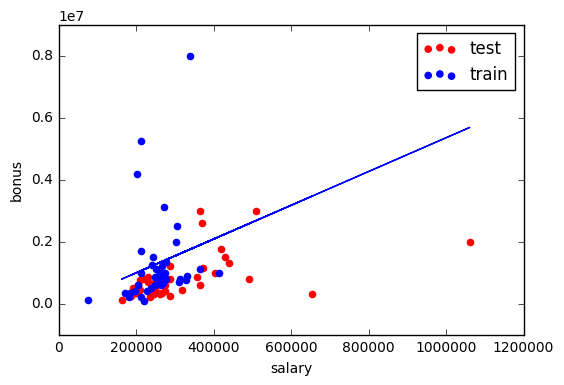

In [7]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [8]:
print 'Slope = %f' % reg.coef_[0]
print 'Intercept = %f' % reg.intercept_

Slope = 5.448140
Intercept = -102360.543294


In [9]:
print 'Score on training data set = %f' % reg.score(feature_train, target_train)
print 'Score on test data set = %f' % reg.score(feature_test, target_test)

Score on training data set = 0.045509
Score on test data set = -1.484992


### Performing regression on feature long_term_incentive

In [10]:
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

In [11]:
reg = LinearRegression()
reg.fit(feature_train, target_train)
print 'The score = %f' % reg.score(feature_test, target_test)

The score = -0.592713


### Outliers

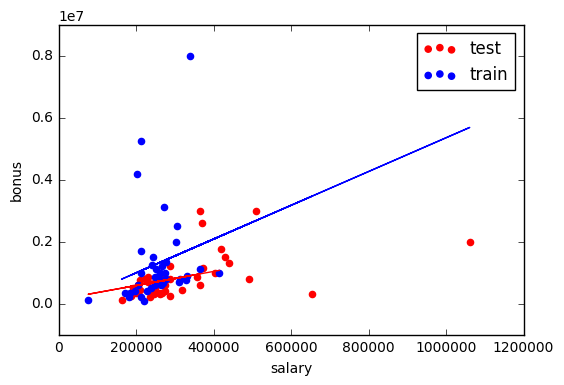

In [12]:
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

reg_train = LinearRegression()
reg_train.fit(feature_train, target_train)
plt.plot( feature_test, reg_train.predict(feature_test) , color="b")

reg_test = LinearRegression()
reg_test.fit(feature_test, target_test)
plt.plot(feature_train, reg_test.predict(feature_train), color="r") 

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [13]:
print 'The slope of the old regression line = %f' % reg_train.coef_[0]

The slope of the old regression line = 5.448140


In [14]:
print 'The slope of the new regression line = %f' % reg_test.coef_[0]

The slope of the new regression line = 2.274101
